<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe7_Rod_Cutting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de Optimización

**Entrada:** Conjunto de números $A = [a_1,a_2,a_3,...,a_n]$ 

**Salida:** Retorno máximo posible $k$

![image](https://imgur.com/GshTi5V.jpg)

Uno de los mayores problemas que surge en la informatica, es la optimización de algoritmos debido a que se necesitan que estos funcionen de la manera más rapida posible sin que sea demasiado "complicado".
Para solucionar esto existen distintos enfoques, y uno de ellos (y el que veremos en el informe) es la **Programación Dinámica**.

#Descripción del Algoritmo

Los algoritmos que funcionan en base a la programación dinámica funcionan de manera similar a los algoritmos "divide y vencerás", donde ambos dividen un problema en sub-problemas y fusionan las soluciones de estos sub-problemas para obtener la solución del problema. 

La programación dinámica lo que hace es solucionar un sub-problema y guardadarlo, de modo que cuando encuentre otra iteración igual al sub-problema "copia" la solución. De tal forma que ahorra tiempo en solucionar el sub-problema.

En el siguiente informe se verá la programación dinámica aplicada en el algoritmo de corte de varillas.

#Código

In [50]:
import math
import numpy as np
from termcolor import colored

def cutRodRecursivo(p, n = -1, l = 0, verbose = False, counting = False):
     
    if n == -1: n = len(p) # Obtener n (no n-1 :v)

    if verbose:
       print(colored(f" " * (l*4) + f"Se obtiene una barra de largo {n}" + "{", "magenta"))

    # Caso base
    if n <= 0: 
        if verbose:
           print(" " * (l*4 + 4) + "Caso base \n" + " " * (l*4) + "}")
        return 0, [] # no hay cortes

    cortes = np.zeros(n+1, int)
    # print ("    " * l + "barra [", "0 "*n + "] ,ganancia = ", p[n-1])
    q = -math.inf # Almacena la ganancia mayor
    for i in range(n):

        if verbose:
          print(colored(f" " * 4*(l+1) + f"Se revisa el {i+1} corte, formando una" + f"barra de largo {n - i-1} y una de largo {i+1}", "blue"))

        # Obtener costo del corte de manera recursiva

        if counting: 
            global count; count+=1
        c, rcortes = cutRodRecursivo(p, n-i-1, l = l + 2, counting = True) 

        c += p[i]

        if verbose: 
          print(colored(" "*4*(l+1)+ f"El corte en {i+1} genera una ganancia {c}", "green"))
        if verbose:
           print(colored(" "*4*(l+1)+ f"El mayor entre {q} y {c} es {max(q,c)}", "yellow"));

        if n-i-1 != 0: 
            rcortes.append(i+1)
            prev = i+1

        if c > q: # si el corte actual es máximo:
            q = c
            cortes = rcortes
        if verbose:
           print(colored(" " * 4 *l + 4*" " + f"n = {n}, i = {i}, q = {q}, c = {c}\n", "cyan"))
    if verbose:
       print (colored(" " * l * 4 + f"}} Máximo = {q}", "magenta"))


    return q, cortes # Devolver valor máximo de ganancia

count = 0
m,c = (cutRodRecursivo([3,5,8,9,10,17,17,20],verbose = True, counting = True))

for i in range(1,len(c)):
    c[i] += c[i-1]
print(colored(f"\nmax:{m}, cortes: {c}, cuenta: {count}", "green"))


Se obtiene una barra de largo 8{
    Se revisa el 1 corte, formando unabarra de largo 7 y una de largo 1
    El corte en 1 genera una ganancia 24
    El mayor entre -inf y 24 es 24
    n = 8, i = 0, q = 24, c = 24

    Se revisa el 2 corte, formando unabarra de largo 6 y una de largo 2
    El corte en 2 genera una ganancia 23
    El mayor entre 24 y 23 es 24
    n = 8, i = 1, q = 24, c = 23

    Se revisa el 3 corte, formando unabarra de largo 5 y una de largo 3
    El corte en 3 genera una ganancia 23
    El mayor entre 24 y 23 es 24
    n = 8, i = 2, q = 24, c = 23

    Se revisa el 4 corte, formando unabarra de largo 4 y una de largo 4
    El corte en 4 genera una ganancia 21
    El mayor entre 24 y 21 es 24
    n = 8, i = 3, q = 24, c = 21

    Se revisa el 5 corte, formando unabarra de largo 3 y una de largo 5
    El corte en 5 genera una ganancia 19
    El mayor entre 24 y 19 es 24
    n = 8, i = 4, q = 24, c = 19

    Se revisa el 6 corte, formando unabarra de largo 2 y una de l

In [57]:
import random
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

def cortadorRecursivo():
  hola = 0

  
cutrod_instance_generator(10)

def bottomUpCut(A, N, cont, verbose = False):
    r = [-1]*(N + 1)
    r[0] = 0

    s = [-1]*(N + 1)
 
    for i in range(1, N+1):
        q = -1
        for j in range(1, i + 1):
            cont[0] += 1
            temp = A[j] + r[i - j]
            if verbose:
              print(colored(f"\nBarra de largo: {i}", "cyan"))
              print(colored(f"Con cortes de largo: {j}", "cyan"))
              print(colored(f"Valor: {temp}", "yellow"))
            if q < temp:
                q = temp
                s[i] = j
        r[i] = q
 
    return r, s

n = 5
p = cutrod_instance_generator(n+1)
cont = [0]
verbose = True
 
print(colored(f"Precios: {p[1:]}", "magenta"))
r, s = bottomUpCut(p, n, cont, verbose)

print(colored(f'\nMaxima ganancia: {r[n]}', "green"))
print('Cortes necesarios: ', end='')

while n > 0:
    print(s[n], end=' ')
    n -= s[n]

if verbose:
  print(colored(f"\nSubProblemas resueltos: {cont[0]}", "green"))

Precios: [17, 27, 37, 41, 51]

Barra de largo: 1
Con cortes de largo: 1
Valor: 17

Barra de largo: 2
Con cortes de largo: 1
Valor: 34

Barra de largo: 2
Con cortes de largo: 2
Valor: 27

Barra de largo: 3
Con cortes de largo: 1
Valor: 51

Barra de largo: 3
Con cortes de largo: 2
Valor: 44

Barra de largo: 3
Con cortes de largo: 3
Valor: 37

Barra de largo: 4
Con cortes de largo: 1
Valor: 68

Barra de largo: 4
Con cortes de largo: 2
Valor: 61

Barra de largo: 4
Con cortes de largo: 3
Valor: 54

Barra de largo: 4
Con cortes de largo: 4
Valor: 41

Barra de largo: 5
Con cortes de largo: 1
Valor: 85

Barra de largo: 5
Con cortes de largo: 2
Valor: 78

Barra de largo: 5
Con cortes de largo: 3
Valor: 71

Barra de largo: 5
Con cortes de largo: 4
Valor: 58

Barra de largo: 5
Con cortes de largo: 5
Valor: 51

Maxima ganancia: 85
Cortes necesarios: 1 1 1 1 1 
SubProblemas resueltos: 15


#Correctitud

El algoritmo recibe un arreglo $[a_1, a_2,..., a_n]$ de precios de venta, de donde retorna correctamente la ganancia máxima $r_n$.

##Prueba del Teorema.

Para comprobar el teorema utilizaremos inducción matemática con 2 casos.

###Caso base $(n=1)$
Para un varilla de largo 1, el algoritmo retorna inmediatamente el precio de la varilla ya que esta posee el tamaño minimo, por lo que no se puede dividir y solo posee un valor para $r_n$.

###Caso general $(n>1)$
Para una varilla de largo mayor a 1, se calcula la ganancia obtenida de $j$ ($1..n$), donde este es el tamaño de todos los posibles sub-problemas en los que se puede dividir el problema original. La función que obtiene el valor $r_n$ se puede describir de manera matemática como: 

$r_n = Precios_j + r_n-j$

> $Precios_j$ es el precio de una varilla de largo $j$, y $r_n-j$ es la ganancia máxima para una varilla de largo $n-j$.

Con esto sabemos que para cualquier varilla con largo $n-j$, ($j>=1$) su ganancia máxima se calculada correctamente.

Como se consideran todos los sub-problemas que pueden salir del problema original, sabemos que uno de estos será el valor que maximice la solucón buscada. El algoritmo retornará el $r_n$ máximo de todos los valores máximos de los sub-problemas.

Considerando todo lo anterior como correcto gracias al caso base y al general, podemos decir de que algoritmo es correcto.

#Tiempo de ejecución

Teniendo en cuenta que para encontrar el retorno máximo $r_n$ el algoritmo necesita solucionar cada problema por varilla de largo $k= 1...n$antes de solucionar el problema original. Y por cada sub-problema $k$ se debe de encontrar cada uno de los cortes de la varilla, siendo esto igual a $j = 1...k$ que sería el punto de corte. Esto significa que por cada problema $k$ se resuelven $j$ sub-problemos, lo que matematicamente se puede plantear como:

$T(n)=\sum\limits_{i=1}^{n+1}\sum\limits_{j=0}^{i}c$

$T(n)=c\sum\limits_{i=1}^{n+1}j$
$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

$T(n)=c*\frac{n(n+1)}{2}$

Considerando que el tiempo para resolver cada sub-problema es constante, ya que los valores que utiliza la función se obtienen a partir de 2 arreglos, por lo que el tiempo que posee esto es de $O(1)$.

Para construir la solución se debe de obtener los cortes para la varilla, estos se obtienen por medio del arreglo $D$ que posee tamaño $n$ y donde se guarda el índice ($j$)donde sea realizo el corte en cada varilla de largo$i$. El peor caso de esto es cuando todo esto da $n$ varilla de largo 1, por lo el tiempo de ejecución sería $O(n)$.

Con todo lo anterior podemos definir 3 funciones:
> $f(n)$ Que corresponde a la cantidad de sub-problemas
> $g(n)$ Es el tiempo que toma resolver cada sub-problema.
> $h(n)$ El tiempo en construir la solución.

Reemplazando se obtiene que:
$T(n) = O(n^2) + O(1) + O(n)$
$T(n) = O(n^2)$

Dado que el algoritmo se trata de uno de optimización el peor caso y el mejor son iguales, por lo que determina el tiempo de ejecución es tamaño del problema que recibe, por lo que se puede decir que la complejidad del algoritmo es $O(n^2)$.

#Experimentación

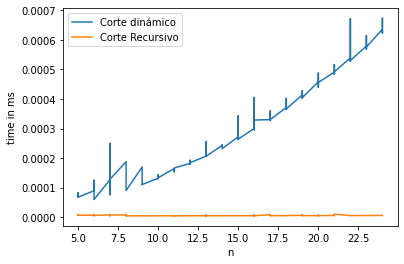

In [60]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; x2=[]; y2=[]

for n in range(5,25):
  nums = []
  nums2 = []

  for i in range(0,n):
    cont = [0]
    a = cutrod_instance_generator(n)

    t = repeat(setup="from __main__ import bottomUpCut", stmt=f"bottomUpCut({a},{len(a)-1},{cont})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import cutRodRecursivo", stmt=f"cutRodRecursivo({a},{False}, {False})", repeat=1, number=10)

    x.append(n)
    y.append(t)

    x2.append(n)
    y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Corte dinámico", "Corte Recursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

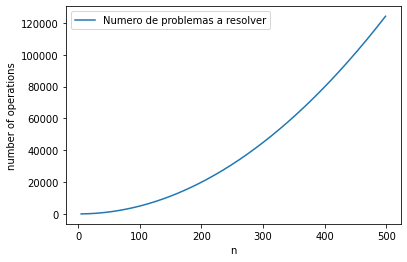

In [61]:
import matplotlib.pyplot as plt

x=[n for n in range(5,500)] 
y=[]; 

for n in range(5,500):
  cont = [0]
  a = cutrod_instance_generator(n)
  bottomUpCut(a, len(a)-1, cont)
  y.append(cont[0])

plt.plot(x,y)
plt.legend(["Numero de problemas a resolver"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()